## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
# Specifying X, Y, and split
X = heart[["age", "chol"]]
y = heart["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Recalculate cholesterol level threshold for a 55 years old
def chol_lr(age, prob, model, scaler):

    # Scale the age feature
    age_scaled = scaler.transform([[age, 0]])[0, 0]

    # Extract coefficients and intercept
    coef_age, coef_chol = model.coef_[0]
    intercept = model.intercept_[0]

    # Calculate the log-odds for the given probability
    log_odds = np.log(prob / (1 - prob))

    # Calculate the scaled cholesterol value for 50% probability (decision boundary)
    chol_scaled = -(intercept + coef_age * age_scaled) / coef_chol

    # Convert the scaled cholesterol value back to original scale
    chol = chol_scaled * scaler.scale_[1] + scaler.mean_[1]
    return chol


lr_chol = chol_lr(55, 0.9, lr, scaler)
lr_chol

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


303.6265988721162

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

def chol_lda(age, model, scaler):
    # Scale the age feature
    age_scaled = scaler.transform([[age, 0]])[0, 0]

    # Extract LDA coefficients and intercept
    coef_age, coef_chol = model.coef_[0]
    intercept = model.intercept_[0]

    # Calculate cholesterol threshold for decision boundary (50% probability)
    chol_scaled = -(intercept + coef_age * age_scaled) / coef_chol

    # Convert scaled cholesterol back to original scale
    chol = chol_scaled * scaler.scale_[1] + scaler.mean_[1]
    return chol

# Calculate cholesterol threshold for 55-year-old using LDA
chol_threshold_lda = chol_lda(55, lda, scaler)
chol_threshold_lda

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


304.16074848952604

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
# GridSearchCV to tune the regularization parameter C
param_grid = {'C': [0.1, 1, 10, 100]}
svc = SVC(kernel="linear")
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_svc = grid_search.best_estimator_


def chol_svc(age, model, scaler):
    # Scale the age feature
    age_scaled = scaler.transform([[age, 0]])[0, 0]

    # Extract SVC coefficients and intercept
    coef_age, coef_chol = model.coef_[0]
    intercept = model.intercept_[0]

    # Calculate cholesterol threshold for the decision boundary (50% probability)
    chol_scaled = -(intercept + coef_age * age_scaled) / coef_chol

    # Convert scaled cholesterol back to the original scale
    chol = chol_scaled * scaler.scale_[1] + scaler.mean_[1]
    return chol

# Calculate cholesterol threshold for a 55-year-old using the best SVC model
chol_threshold_svc = chol_svc(55, best_svc, scaler)
chol_threshold_svc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


262.73912382123325

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/usr/local/lib/python3.10/dist-packages/

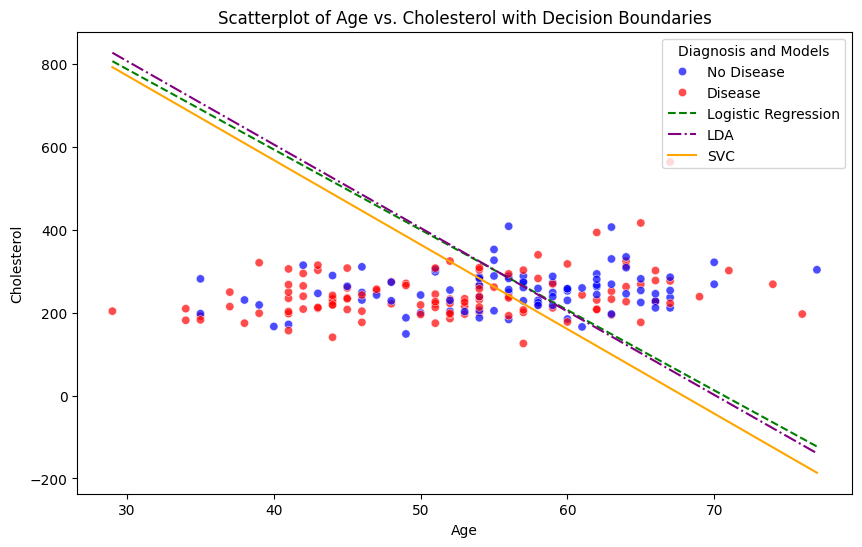

In [ ]:
import matplotlib.pyplot as plt

# Function to calculate cholesterol threshold for decision boundaries
def calc_chol_threshold(age, model, scaler):
    age_scaled = scaler.transform([[age, 0]])[0, 0]  # Scale age only
    coef_age, coef_chol = model.coef_[0]
    intercept = model.intercept_[0]
    chol_scaled = -(intercept + coef_age * age_scaled) / coef_chol
    chol = chol_scaled * scaler.scale_[1] + scaler.mean_[1]
    return chol

# Generate age values for plotting
age_vals = np.linspace(X['age'].min(), X['age'].max(), 100)

# Calculate decision boundaries for each model
chol_vals_lr = [calc_chol_threshold(age, lr, scaler) for age in age_vals]
chol_vals_lda = [calc_chol_threshold(age, lda, scaler) for age in age_vals]
chol_vals_svc = [calc_chol_threshold(age, best_svc, scaler) for age in age_vals]

# Plot scatterplot with decision boundaries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart, x='age', y='chol', hue='diagnosis',
                palette={'No Disease': 'blue', 'Disease': 'red'}, alpha=0.7)

# Add decision boundary lines
plt.plot(age_vals, chol_vals_lr, label='Logistic Regression', linestyle='--', color='green')
plt.plot(age_vals, chol_vals_lda, label='LDA', linestyle='-.', color='purple')
plt.plot(age_vals, chol_vals_svc, label='SVC', linestyle='-', color='orange')

# Customize the plot
plt.title('Scatterplot of Age vs. Cholesterol with Decision Boundaries')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Diagnosis and Models', loc='upper right')
plt.show()